<a href="https://colab.research.google.com/github/baranouskiart/rmf_analysis/blob/main/product_amazon_customers_sellers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## RMF - NEED TO UPDATE DATE INFORMATION FROM URL PARSING IT
!!!!!

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
import pandas as pd
import re

#There is no transaction data, like invoice and date. However I could treat each review as a “purchase”,
#and calculate the recency, frequency, and “monetary” value (perhaps based on rating or price) of reviews for each product.
#This would give you an idea of which products are being reviewed most often and most favorably.

#Load Data

In [18]:
df = pd.read_csv('https://query.data.world/s/2e4tqfh2w4vfgje7i6b5xg666jmk5w?dws=00000') #uniq_id, price, number_available_in_stock [sep]
df.head() #amazon co-ecommerce sample (not full dataset)

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15,1.0,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...,Worth Buying For The Pictures Alone (As Ever) ...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ..."
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,£16.99,NaN,2,1.0,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,can you turn off sounds // hi no you cant turn...,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...,"{""seller""=>{""Seller_name_1""=>""UHD WHOLESALE"", ..."
2,348f344247b0c1a935b1223072ef9d8a,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,£9.99,2 new,17,2.0,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Classic-Train-Lights-B...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,What is the gauge of the track // Hi Paul.Trut...,**Highly Recommended!** // 5.0 // 26 May 2015 ...,"{""seller""=>[{""Seller_name_1""=>""DEAL-BOX"", ""Sel..."
3,e12b92dbb8eaee78b22965d2a9bbbd9f,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,£39.99,NaN,1,2.0,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,NaN,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Technical Details Item Weight259 g Product Dim...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,NaN,NaN,I love it // 5.0 // 22 July 2013 // By\n \n...,NaN
4,e33a9adeed5f36840ccc227db4682a36,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,£32.19,NaN,3,2.0,4.7 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R6367-RailRoad-...,Product Description Hornby RailRoad 0-4-0 Gild...,Technical Details Item Weight159 g Product Dim...,Product Description Hornby RailRoad 0-4-0 Gild...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...,NaN,Birthday present // 5.0 // 14 April 2014 // By...,NaN


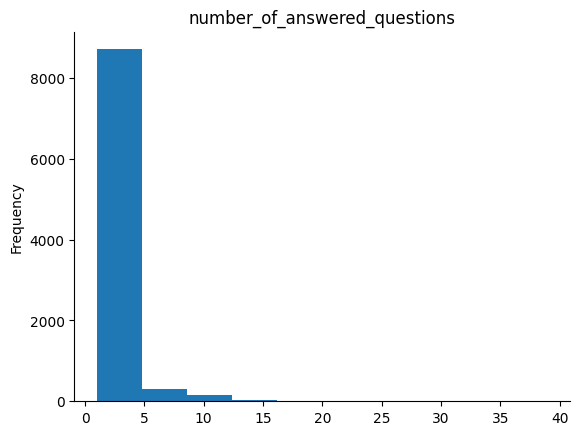

In [4]:
# @title Number of answered questions (distribution)

from matplotlib import pyplot as plt
df['number_of_answered_questions'].plot(kind='hist', bins=10, title='number_of_answered_questions')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [19]:
# Define a function to remove symbols and convert to float
def convert_to_float(x):
  try:
    # Remove leading/trailing characters except numbers, ".", "+" or "-".
    return float(re.sub(r"[^\d\.]", "", x))
  except:
    # Handle potential errors (e.g., empty string) and return missing value (e.g., np.nan)
    return pd.NA

# Apply the function to 'price' and 'number_available_in_stock' columns
df['price'] = df['price'].apply(convert_to_float)
df['number_available_in_stock'] = df['number_available_in_stock'].apply(convert_to_float)
df = df.rename(columns={'price': 'price_£'})
df = df.rename(columns={'number_available_in_stock': 'new_in_stock'})
# Print the modified DataFrame
df.head()

,uniq_id,product_name,manufacturer,price_£,new_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,3.42,5.0,15,1.0,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...,Worth Buying For The Pictures Alone (As Ever) ...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ..."
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,16.99,<NA>,2,1.0,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,can you turn off sounds // hi no you cant turn...,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...,"{""seller""=>{""Seller_name_1""=>""UHD WHOLESALE"", ..."
2,348f344247b0c1a935b1223072ef9d8a,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,9.99,2.0,17,2.0,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Classic-Train-Lights-B...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,What is the gauge of the track // Hi Paul.Trut...,**Highly Recommended!** // 5.0 // 26 May 2015 ...,"{""seller""=>[{""Seller_name_1""=>""DEAL-BOX"", ""Sel..."
3,e12b92dbb8eaee78b22965d2a9bbbd9f,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,39.99,<NA>,1,2.0,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,NaN,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Technical Details Item Weight259 g Product Dim...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,NaN,NaN,I love it // 5.0 // 22 July 2013 // By\n \n...,NaN
4,e33a9adeed5f36840ccc227db4682a36,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,32.19,<NA>,3,2.0,4.7 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R6367-RailRoad-...,Product Description Hornby RailRoad 0-4-0 Gild...,Technical Details Item Weight159 g Product Dim...,Product Description Hornby RailRoad 0-4-0 Gild...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...,NaN,Birthday present // 5.0 // 14 April 2014 // By...,NaN


## Group Data

In [20]:
df['Total']=df['new_in_stock']*df['price_£']

In [21]:
df['Total'].head()

0     17.1
1     <NA>
2    19.98
3     <NA>
4     <NA>
Name: Total, dtype: object

In [22]:
# Assuming df is your DataFrame
cols_to_convert = ['number_of_reviews']

for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [23]:
df.head()

,uniq_id,product_name,manufacturer,price_£,new_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers,Total
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,3.42,5.0,15.0,1.0,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...,Worth Buying For The Pictures Alone (As Ever) ...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ...",17.1
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,16.99,<NA>,2.0,1.0,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,can you turn off sounds // hi no you cant turn...,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...,"{""seller""=>{""Seller_name_1""=>""UHD WHOLESALE"", ...",<NA>
2,348f344247b0c1a935b1223072ef9d8a,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,9.99,2.0,17.0,2.0,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Classic-Train-Lights-B...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,What is the gauge of the track // Hi Paul.Trut...,**Highly Recommended!** // 5.0 // 26 May 2015 ...,"{""seller""=>[{""Seller_name_1""=>""DEAL-BOX"", ""Sel...",19.98
3,e12b92dbb8eaee78b22965d2a9bbbd9f,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,39.99,<NA>,1.0,2.0,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,NaN,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Technical Details Item Weight259 g Product Dim...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,NaN,NaN,I love it // 5.0 // 22 July 2013 // By\n \n...,NaN,<NA>
4,e33a9adeed5f36840ccc227db4682a36,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,32.19,<NA>,3.0,2.0,4.7 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R6367-RailRoad-...,Product Description Hornby RailRoad 0-4-0 Gild...,Technical Details Item Weight159 g Product Dim...,Product Description Hornby RailRoad 0-4-0 Gild...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...,NaN,Birthday present // 5.0 // 14 April 2014 // By...,NaN,<NA>


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   uniq_id                                      10000 non-null  object 
 1   product_name                                 10000 non-null  object 
 2   manufacturer                                 9993 non-null   object 
 3   price_£                                      8547 non-null   object 
 4   new_in_stock                                 7500 non-null   object 
 5   number_of_reviews                            9980 non-null   float64
 6   number_of_answered_questions                 9235 non-null   float64
 7   average_review_rating                        9982 non-null   object 
 8   amazon_category_and_sub_category             9310 non-null   object 
 9   customers_who_bought_this_item_also_bought   8938 non-null   object 
 10 

In [25]:
df.isnull().sum() #There is no difference in descriptions
#BIG NUMBER OF ZERO-VALUES: sellers, number_available_in_stock, price, customer_questions_and_answers, items_customers_buy_after_viewing_this_item

uniq_id                                           0
product_name                                      0
manufacturer                                      7
price_£                                        1453
new_in_stock                                   2500
number_of_reviews                                20
number_of_answered_questions                    765
average_review_rating                            18
amazon_category_and_sub_category                690
customers_who_bought_this_item_also_bought     1062
description                                     651
product_information                              58
product_description                             651
items_customers_buy_after_viewing_this_item    3065
customer_questions_and_answers                 9086
customer_reviews                                 21
sellers                                        3082
Total                                          3664
dtype: int64

In [26]:
df.isnull().sum()*100/len(df)
#what is percent of zero values

uniq_id                                         0.00
product_name                                    0.00
manufacturer                                    0.07
price_£                                        14.53
new_in_stock                                   25.00
number_of_reviews                               0.20
number_of_answered_questions                    7.65
average_review_rating                           0.18
amazon_category_and_sub_category                6.90
customers_who_bought_this_item_also_bought     10.62
description                                     6.51
product_information                             0.58
product_description                             6.51
items_customers_buy_after_viewing_this_item    30.65
customer_questions_and_answers                 90.86
customer_reviews                                0.21
sellers                                        30.82
Total                                          36.64
dtype: float64

In [ ]:
df.loc[(df['description'].isnull())&(df['CustomerID'].isnull())]

## Data Preprocessing

In [27]:
df.drop('average_review_rating', axis=1).describe().T

,count,mean,std,min,25%,50%,75%,max
number_of_reviews,9980.0,8.897395,28.942848,1.0,1.0,2.0,6.0,802.0
number_of_answered_questions,9235.0,1.834976,2.517268,1.0,1.0,1.0,2.0,39.0


In [28]:
df.columns

Index(['uniq_id', 'product_name', 'manufacturer', 'price_£', 'new_in_stock',
       'number_of_reviews', 'number_of_answered_questions',
       'average_review_rating', 'amazon_category_and_sub_category',
       'customers_who_bought_this_item_also_bought', 'description',
       'product_information', 'product_description',
       'items_customers_buy_after_viewing_this_item',
       'customer_questions_and_answers', 'customer_reviews', 'sellers',
       'Total'],
      dtype='object')

In [32]:
duplicates = df['product_name'].duplicated()
duplicates.sum()

36

In [36]:
duplicates = df['manufacturer'].duplicated()
duplicates.sum()

7348

In [38]:
df.groupby(['product_name'])['Total'].sum().sort_values()

product_name
"5 daisy" spacer bead 8mm x 3mm. Pack of 15                                                      0
MONSTER HIGH SKULL LIFE STICKER COLLECTION PANINI ~ 10 PACKS                                     0
MICRO SLOTCAR FIREBIRD                                                                           0
MG Metro 6R4, No.23, Repco, Rallye Great Britain, 1986, Model Car, Ready-made, IXO 1:43          0
MERRY CHRISTMAS PLAQUE RED DECORATION PACK OF 3                                                  0
                                                                                            ...   
Parrot Bebop Drone 2 (White)                                                               4839.45
Bowen Designs - Marvel Statue Thor Classic Action 49 cm                                    4879.84
Hot Toys Movie Masterpiece - Avengers Age of Ultron: Thor                                  5206.95
LEGO Star Wars 75103: First Order Transporter                                              5519.

In [39]:
df.groupby(['manufacturer'])['Total'].sum().sort_values()

manufacturer
MBNF                        0
SORA                        0
SOPHZZZZ TOY SHOP           0
SMER                        0
Fine Horse                  0
                       ...   
Bruder                23754.9
Hot Toys             26060.38
Star Wars            28490.28
Playmobil            49721.78
LEGO                  88777.0
Name: Total, Length: 2651, dtype: object

In [35]:
# sum the 'number_of_reviews', sort the values, and filter out the zeros
df_grouped = df.groupby(['manufacturer'])['number_of_reviews'].sum().sort_values()
df_grouped = df_grouped[df_grouped != 0]

In [41]:
df_grouped.tail() #most popular manufacturers (not show the tone of review)

manufacturer
Nollmit         1566.0
Star Wars       1595.0
Orchard Toys    1608.0
LEGO            2930.0
Playmobil       3222.0
Name: number_of_reviews, dtype: float64

In [44]:
df.tail()

,uniq_id,product_name,manufacturer,price_£,new_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers,Total
9995,44d6967f083825a5de36ad4865a65bcd,Batman 1966 TV Series Action Figures - The Rid...,Mattel,22.95,5.0,3.0,3.0,5.0 out of 5 stars,Hobbies > Collectible Figures & Memorabilia > ...,http://www.amazon.co.uk/Batman-1966-Series-Act...,DC 66 Batman Classic TV Series 6 Inch Riddler ...,Technical Details Item Weight136 g Product Dim...,DC 66 Batman Classic TV Series 6 Inch Riddler ...,NaN,NaN,Realistic // 5.0 // 31 Mar. 2014 // By\n \n...,"{""seller""=>[{""Seller_name_1""=>""Star Action Fig...",114.75
9996,08f0747b6fc6687215ffb994c3a6fb32,"Star Wars Costume, Kids Stormtrooper Costume S...",Star Wars,39.99,<NA>,1.0,3.0,4.0 out of 5 stars,Characters & Brands > Star Wars > Toys,http://www.amazon.co.uk/Storm-Trooper-Costume-...,NaN,Technical Details Additional Information AS...,NaN,http://www.amazon.co.uk/Storm-Trooper-Costume-...,NaN,... what I see my grandson us going to have fu...,NaN,<NA>
9997,bf6cc073f8f24e6e338190fa16f6ee9d,Defiance Lawkeeper Metal Badge Prop Replica,Olde Scotland Yard Ltd.,43.99,3.0,1.0,3.0,5.0 out of 5 stars,Novelty & Special Use > Novelty > Accessories ...,NaN,*Includes 1x Badge with holder and chain *High...,Technical Details Item Weight159 g Product Dim...,*Includes 1x Badge with holder and chain *High...,http://www.amazon.co.uk/Olde-Scotland-Yard-Ltd...,NaN,Five Stars // 5.0 // 18 Dec. 2015 // By\n \...,"{""seller""=>[{""Seller_name_1""=>""YUK"", ""Seller_p...",131.97
9998,cd783d0b8b44e631b9788b203eaaefae,Justice League of America Series 3 Green Lante...,DC Comics,49.81,3.0,1.0,3.0,5.0 out of 5 stars,Hobbies > Collectible Figures & Memorabilia > ...,NaN,Designed by Ed BenesIt's here - the third seri...,Technical Details Item Weight181 g Product Dim...,Designed by Ed BenesIt's here - the third seri...,NaN,NaN,The best sculpt in a while // 5.0 // 13 May 20...,"{""seller""=>[{""Seller_name_1""=>""Smaller World F...",149.43
9999,94d18e86e504bee1e392df7e5738b18a,Star Wars 1/72 Y-Wing Starfighter,Bandai,21.2,31.0,11.0,3.0,4.5 out of 5 stars,Characters & Brands > Star Wars > Toys,http://www.amazon.co.uk/Bandai-Star-Wars-Fight...,NaN,Technical Details Item Weight299 g Product Dim...,NaN,NaN,NaN,Gold leader // 5.0 // 31 Aug. 2015 // By\n ...,NaN,657.2


In [45]:
# sum the 'number_of_reviews', sort the values, and filter out the zeros
df_grouped = df.groupby(['manufacturer'])['number_of_answered_questions'].sum().sort_values()
df_grouped = df_grouped[df_grouped != 0]

In [46]:
df_grouped.tail() #most active by response manufacturers or sellers (not show the tone of review)

manufacturer
Mattel            203.0
Oxford Diecast    229.0
Disney            305.0
Playmobil         353.0
LEGO              390.0
Name: number_of_answered_questions, dtype: float64

In [47]:
df['manufacturer'].value_counts().head(20) #most popular manufactures in dataset

manufacturer
LEGO                             171
Disney                           167
Oxford Diecast                   156
Playmobil                        147
Star Wars                        120
Mattel                           114
Hasbro                           110
The Puppet Company               109
MyTinyWorld                       93
Corgi                             90
Hornby                            87
Scalextric                        76
Pokémon                           69
Schleich                          68
Amscan                            65
Every-occasion-party-supplies     62
FunKo                             59
Melissa & Doug                    59
Papo                              58
Tamiya                            57
Name: count, dtype: int64

## Explore the Manufacturer

In [48]:
df_Mattel=df.loc[df['manufacturer']=='Mattel'] #the most active manufacturer dataset

In [49]:
df_Mattel

,uniq_id,product_name,manufacturer,price_£,new_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers,Total
86,4b15acfc7dc8ff73020661531b9c3a3d,Thomas and Friends Track Master Dockside Deliv...,Mattel,13.87,6.0,1.0,1.0,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Thomas-Friends-Trackma...,Trackmaster Revolution Dockside Delivery Crane...,Technical Details Item Weight141 g Product Dim...,Trackmaster Revolution Dockside Delivery Crane...,http://www.amazon.co.uk/Thomas-Friends-Trackma...,NaN,Five Stars // 5.0 // 17 Dec. 2015 // By\n \...,"{""seller""=>[{""Seller_name_1""=>""JemToys"", ""Sell...",83.22
713,136d1e399d3be623ae941b82d5b083e2,Monster High advents calendar,Mattel,30.18,<NA>,2.0,3.0,4.5 out of 5 stars,NaN,http://www.amazon.co.uk/Monster-High-Advent-Be...,Monster High advents calendar - Monster High 9...,Technical Details Item Weight522 g Product Dim...,Monster High advents calendar - Monster High 9...,http://www.amazon.co.uk/Monster-High-Advent-Be...,NaN,Quite a few windows empty !!!! // 4.0 // 13 De...,"{""seller""=>{""Seller_name_1""=>""Son Services gGm...",<NA>
731,555c900756b846482ed5821ee37e412d,Mattel BCK27 - Angry Birds Advent Calendar,Mattel,29.0,3.0,1.0,6.0,4.0 out of 5 stars,NaN,http://www.amazon.co.uk/Angry-Birds-Pig-Rock-R...,Angry Birds Advent Calendar: This is a premium...,Technical Details Item Weight544 g Product Dim...,Angry Birds Advent Calendar: This is a premium...,NaN,NaN,Four Stars // 4.0 // 11 Oct. 2015 // By\n \...,"{""seller""=>[{""Seller_name_1""=>""AT-STOCK"", ""Sel...",87.0
797,98c21ade2223060290f581d43c0ae209,Matchbox Cars - 60th Anniversary Collection - ...,Mattel,6.94,<NA>,1.0,11.0,5.0 out of 5 stars,Die-Cast & Toy Vehicles > Toy Vehicles & Acces...,http://www.amazon.co.uk/Matchbox-N5424-20-Car-...,NaN,Technical Details Manufacturer recommended age...,NaN,http://www.amazon.co.uk/Siku-1404-US-Patrol-Ca...,NaN,Five Stars // 5.0 // 19 Jan. 2015 // By\n \...,NaN,<NA>
799,dc603e26ae1406347d8f0323612bda3a,Disney Pixar BDW82 Cars Jessica Giampetrol & N...,Mattel,7.99,14.0,2.0,11.0,5.0 out of 5 stars,Die-Cast & Toy Vehicles > Toy Vehicles & Acces...,http://www.amazon.co.uk/Disney-Pixar-Cars-Kimb...,Disney/Pixar Cars Collector Die-cast 2 Pack Co...,Technical Details Item Weight109 g Product Dim...,Disney/Pixar Cars Collector Die-cast 2 Pack Co...,http://www.amazon.co.uk/Disney-Pixar-Cars-Kimb...,NaN,Five Stars // 5.0 // 19 Dec. 2015 // By\n \...,NaN,111.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9898,d6eeeb53a54e7611a7b9880c3c48175e,Mattel - Scene It? Friends DVD Game,Mattel,59.99,8.0,36.0,1.0,4.6 out of 5 stars,Games > DVD Games,http://www.amazon.co.uk/Friends-Official-Trivi...,Product Description Be the first to answer Fri...,Technical Details Item Weight3 Kg Product Dime...,Product Description Be the first to answer Fri...,NaN,What region is the DVD specific to? // Region ...,The perfect game for Friends Addicts! // 4.0 /...,"{""seller""=>[{""Seller_name_1""=>""tailor10"", ""Sel...",479.92
9915,4f955d75276bc16b1ff27dd88c7dc686,FIFA Scene It? DVD Game,Mattel,1.59,19.0,5.0,1.0,4.4 out of 5 stars,Games > DVD Games,http://www.amazon.co.uk/Toys-UEFA-Champions-Le...,Product Description Major new license game for...,Technical Details Item Weight1.1 Kg Product Di...,Product Description Major new license game for...,http://www.amazon.co.uk/The-Green-Board-Game-C...,Can I buy an up to date set of cards and DVD f...,Great game // 5.0 // 29 Jun. 2013 // By\n \...,"{""seller""=>[{""Seller_name_1""=>""Angela's Books""...",30.21
9933,7b8edfb087ede832f19249372fdbba83,Scene it? Magical Moments Disney DVD Game,Mattel,45.99,4.0,7.0,2.0,4.3 out of 5 stars,Characters & Brands > Disney > 

In [51]:
df_Mattel['new_in_stock'].value_counts().head(20)

new_in_stock
3.0     19
2.0     12
1.0     12
4.0     11
5.0     10
11.0     6
6.0      5
7.0      5
10.0     5
8.0      3
9.0      3
13.0     2
14.0     2
12.0     2
19.0     2
21.0     1
15.0     1
26.0     1
17.0     1
16.0     1
Name: count, dtype: int64

##Data Group Analysis

In [52]:
df.groupby(['average_review_rating'])[['manufacturer']].nunique()#/df.groupby(['average_review_rating'])[['manufacturer']].count()

,manufacturer
average_review_rating,
2.3 out of 5 stars,1
3.0 out of 5 stars,3
3.3 out of 5 stars,2
3.5 out of 5 stars,2
3.6 out of 5 stars,3
3.7 out of 5 stars,2
3.8 out of 5 stars,1
3.9 out of 5 stars,7
4.0 out of 5 stars,729


## Data Research

In [ ]:
#df.groupby(['average_review_rating'])[['product_name']].nunique()/df.groupby(['average_review_rating'])[['product_name']].count()